# Visualize with Makie

In Julia, there are several packages for plotting. One of the prefered options is
[Makie.jl](https://docs.makie.org) which is mainly written in Julia. There is also
high-level packages written over Makie.jl to make coding easier:
[AlgebraOfGraphics.jl](https://aog.makie.org/) and
[TidierPlots.jl](https://github.com/TidierOrg/TidierPlots.jl).

## Packages and data

In [1]:
using DataFrames
using CairoMakie
using AlgebraOfGraphics
import Random

Random.seed!(11)

df = DataFrame(id = 1:100, x = randn(100), y = randn(100))
first(df, 5)

Row,id,x,y
,Int64,Float64,Float64
1,1,-0.367539,1.67104
2,2,-0.686468,-0.253313
3,3,-0.360026,1.90599
4,4,-0.661077,1.0981
5,5,-1.14227,-0.490607


## Makie.jl

Let's start with a `lines` graph:

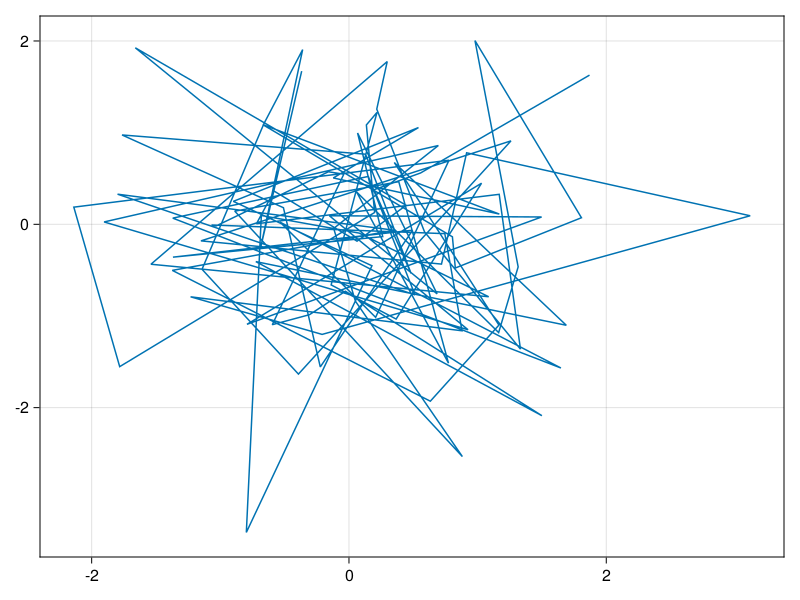

In [2]:
fig = lines(df.x, df.y)

You can add a geometry over this current graph:

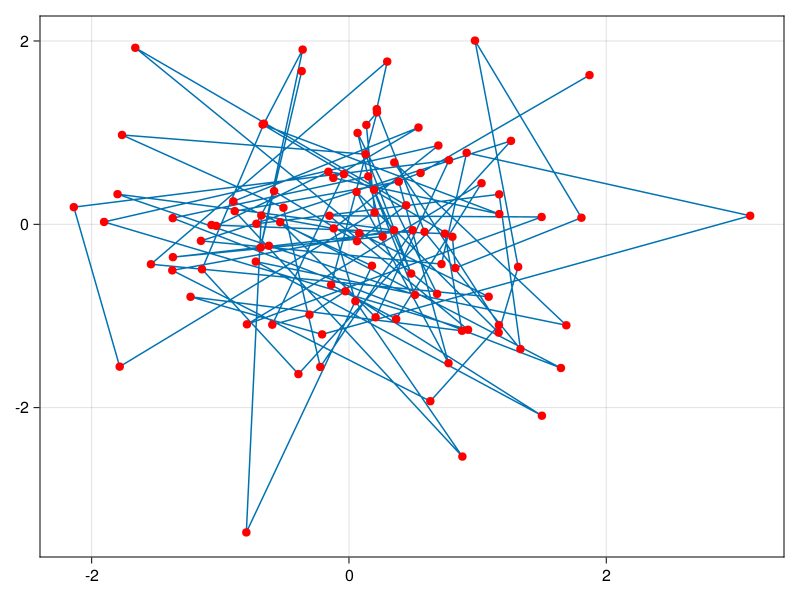

In [3]:
scatter!(df.x, df.y, color = :red)
fig

To customize the graph we need to understand we have the following the componentes are:

- Figure: Is the main container with custom attributes like `backgroundcolor`.
- Axis: Is the object where a geometry can be added and it is contained in a Figure.

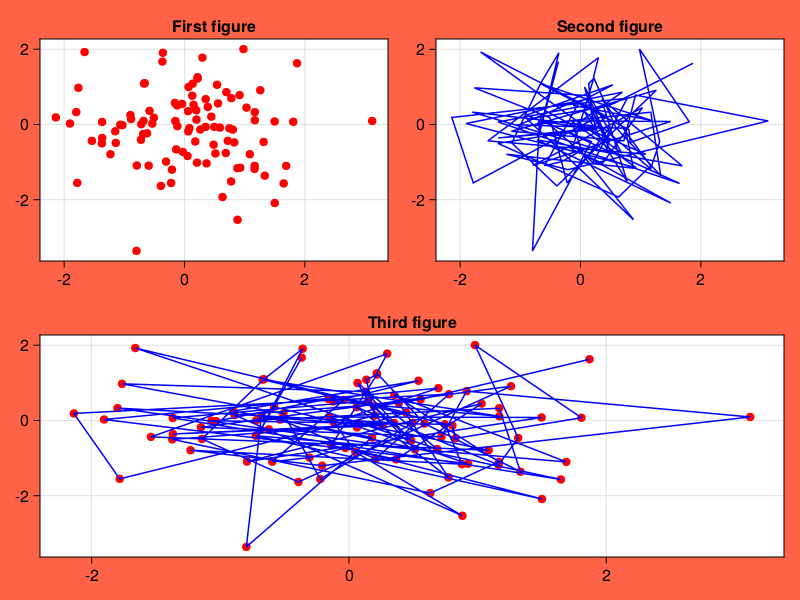

In [4]:
fig = Figure(backgroundcolor = :tomato)
Axis(fig[1,1], title = "First figure")
scatter!(df.x, df.y, color = :red)
Axis(fig[1,2], title = "Second figure")
lines!(df.x, df.y, color = :blue)
Axis(fig[2,1:2], title = "Third figure")
scatter!(df.x, df.y, color = :red)
lines!(df.x, df.y, color = :blue)
fig

Common arguments for the `Axis` elements are `title`, `xlabel`, `ylabel`.

Now let's create a figure with legends:

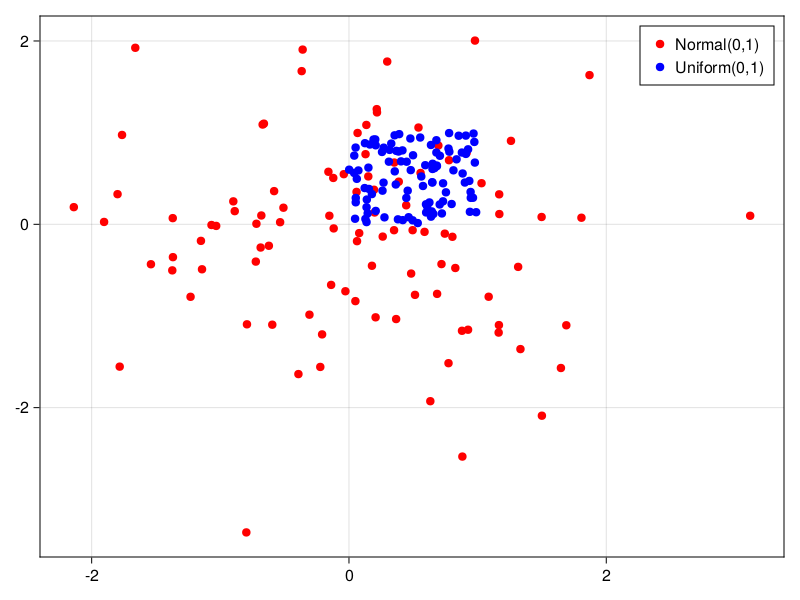

In [5]:
fig = scatter(df.x, df.y, color = :red, label = "Normal(0,1)")
scatter!(rand(100), rand(100), color = :blue, label = "Uniform(0,1)")
axislegend()
fig

A figure with colorbar:

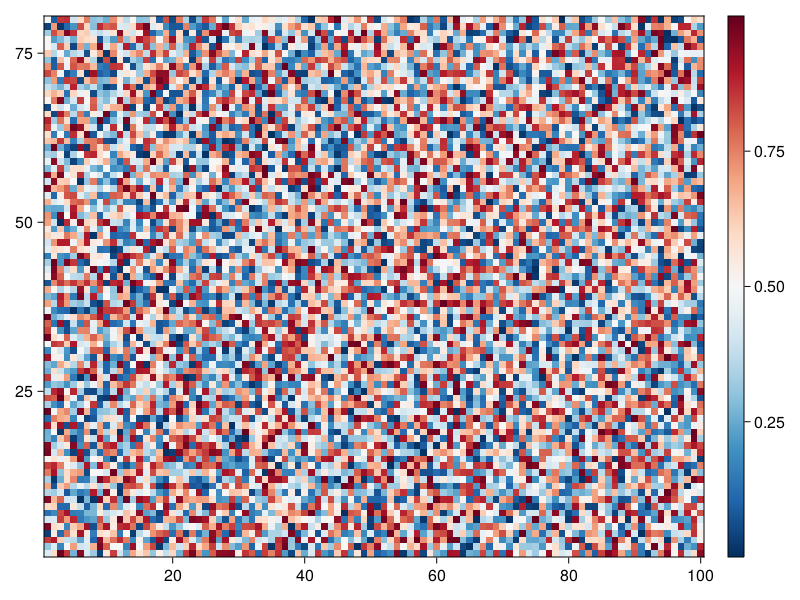

In [6]:
X = rand(100, 80)
fig, ax, hm = heatmap(X, colormap = Reverse(:RdBu))
Colorbar(fig[1,2], hm)
fig

You can pass the `Figure` and `Axis` attributes to the plotting function:

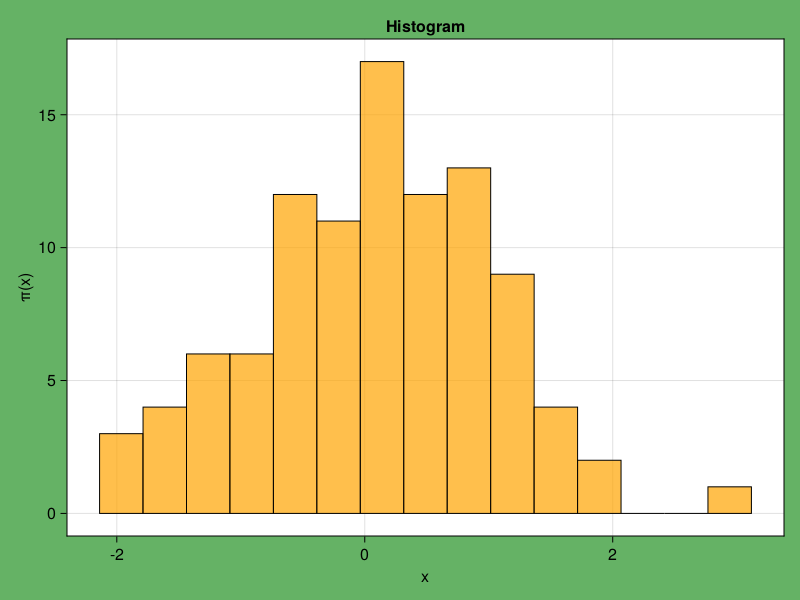

In [7]:
hist(df.x, color = (:orange, 0.7), strokewidth = 1,
    axis = (title = "Histogram", xlabel = "x", ylabel = "π(x)"),
    figure = (backgroundcolor = (:green, 0.6),)
)

Check [Makie.jl](https://docs.makie.org/stable/reference/plots/) to find all available
plots.

## Algebra of Graphics

In practice, `Makie.jl` is used for developers and custom plots for publication. We can
use `AlgebraOfGraphics.jl` for a high level syntax.

In [8]:
df.group = rand(string.(1:4), 100)
first(df, 5)

Row,id,x,y,group
,Int64,Float64,Float64,String
1,1,-0.367539,1.67104,4
2,2,-0.686468,-0.253313,3
3,3,-0.360026,1.90599,1
4,4,-0.661077,1.0981,4
5,5,-1.14227,-0.490607,4


Let's see a basic graph using `AlgebraOfGraphics.jl`.

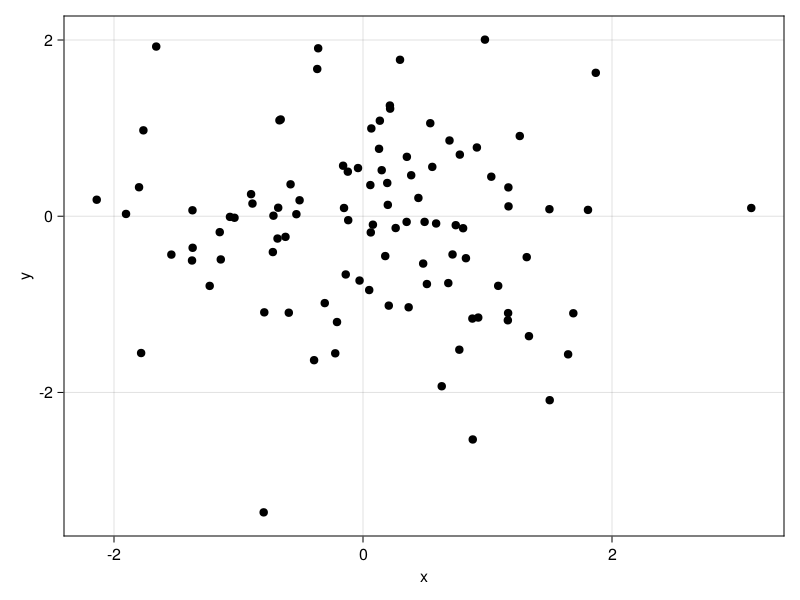

In [9]:
g = data(df) * mapping(:x, :y)
draw(g)

You can use `DataFrames.jl` syntax to transform variables:

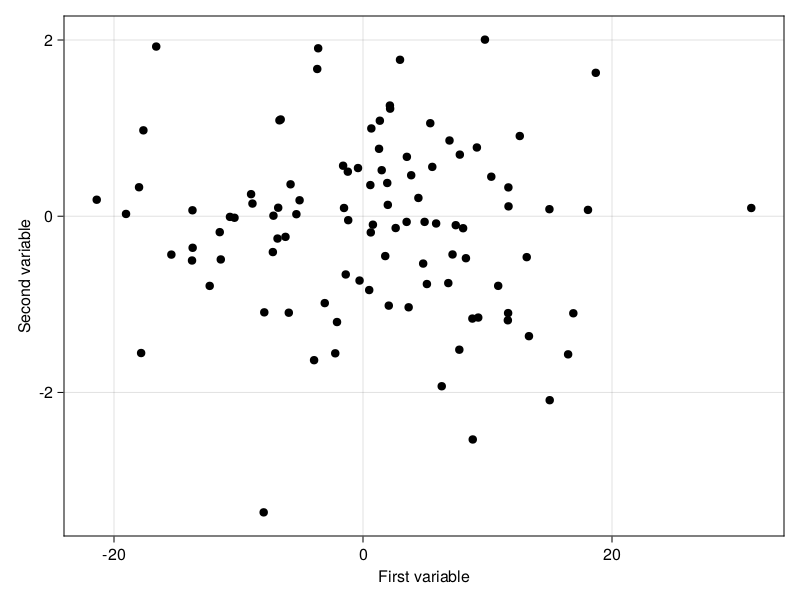

In [10]:
g = data(df) * mapping(:x => (z -> 10z) => "First variable", :y => "Second variable")
draw(g)

We can use another geometry with `visual`:

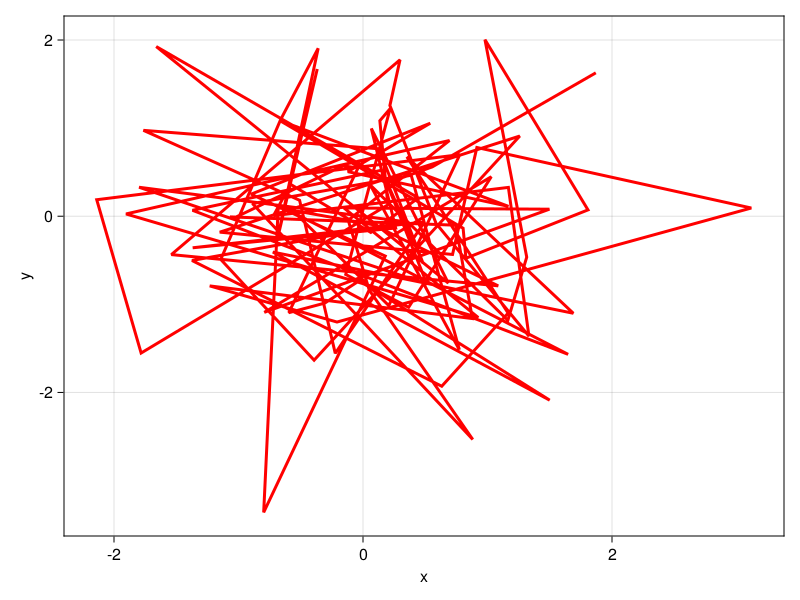

In [11]:
g = data(df) * mapping(:x, :y) * visual(Lines, color = :red, linewidth = 3)
draw(g)

Notice that the order does not matter:

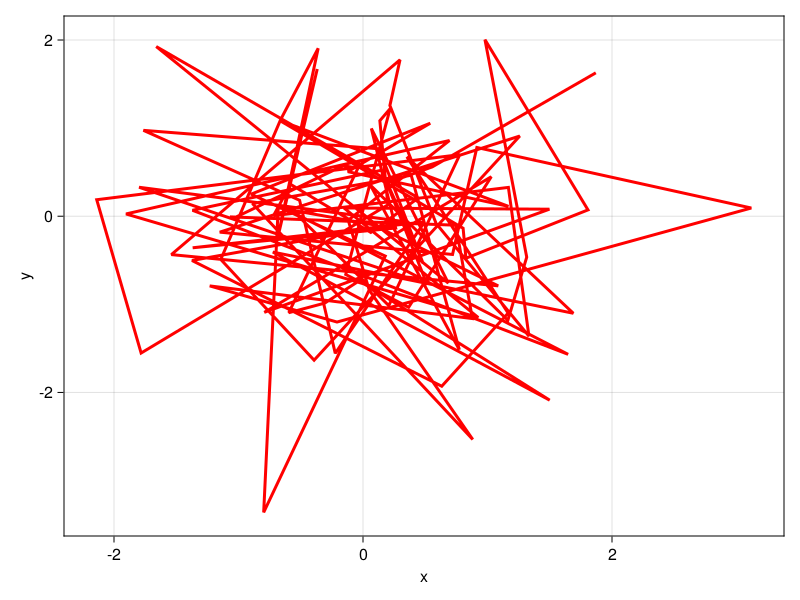

In [12]:
g = mapping(:x, :y) * data(df) * visual(Lines, color = :red, linewidth = 3)
draw(g)

We can use the `+` operator to combine graphs:

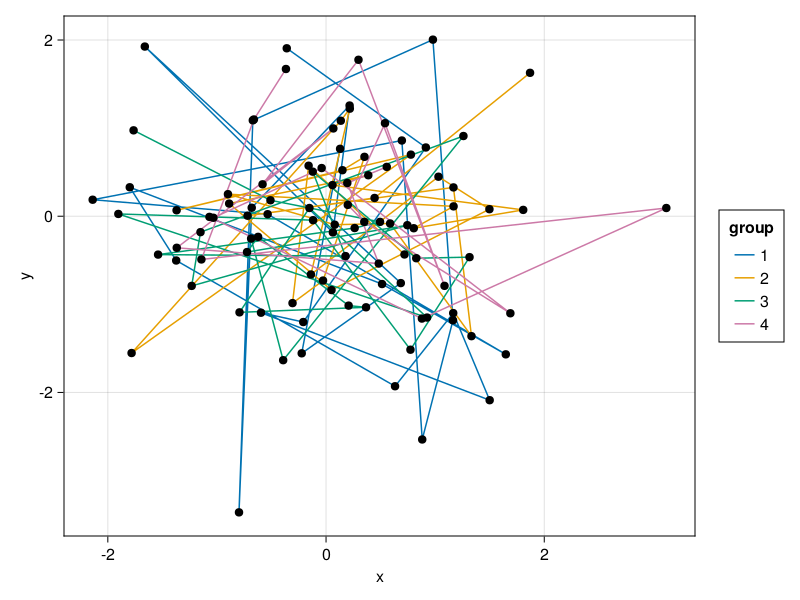

In [13]:
g = data(df) * mapping(:x, :y, color = :group) * visual(Lines) +
    data(df) * mapping(:x, :y) * visual(Scatter)
draw(g)

Why is it called `AlgebraOfGraphics.jl`?

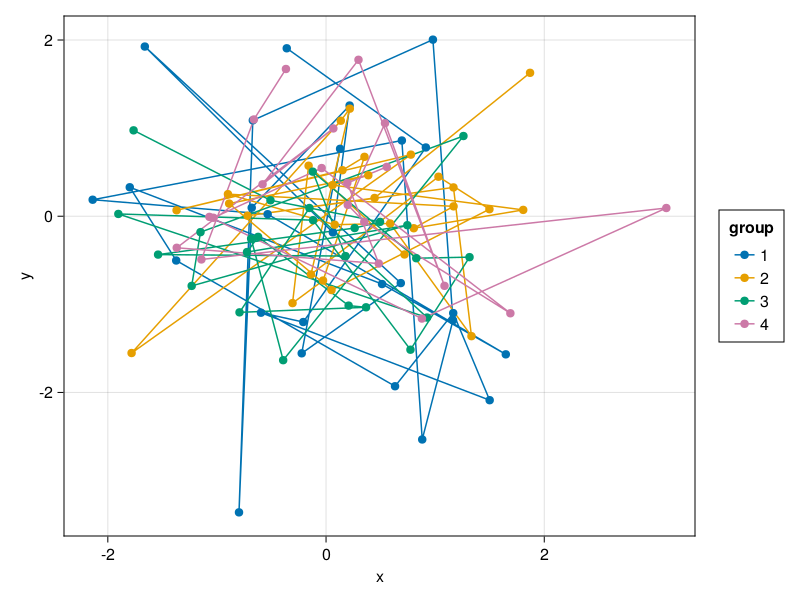

In [14]:
g = data(df) * mapping(:x, :y, color = :group) *
    (visual(Lines) + visual(Scatter))
draw(g)

You can factorize any part:

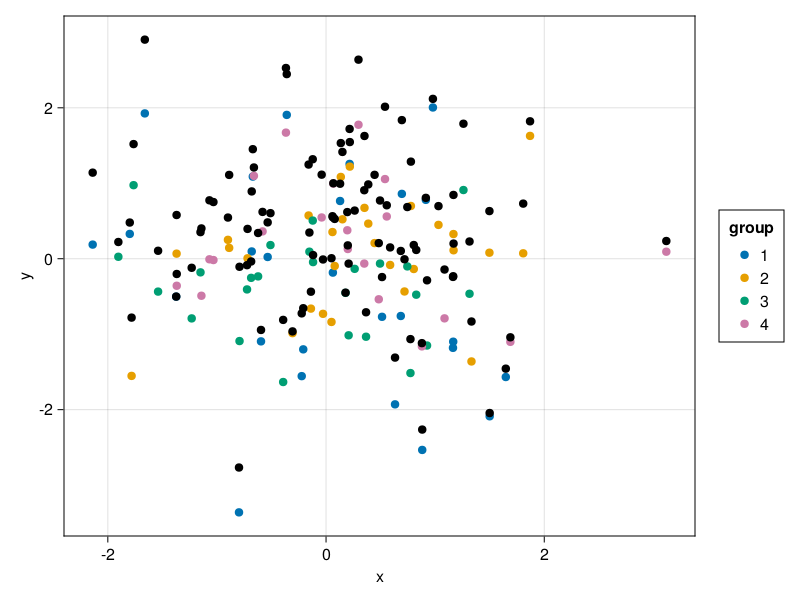

In [15]:
addnoise(x) = x + rand()
g = data(df) *
    (mapping(:x, :y, color = :group) + mapping(:x, :y => addnoise))
draw(g)

Let's separating the plots by group:

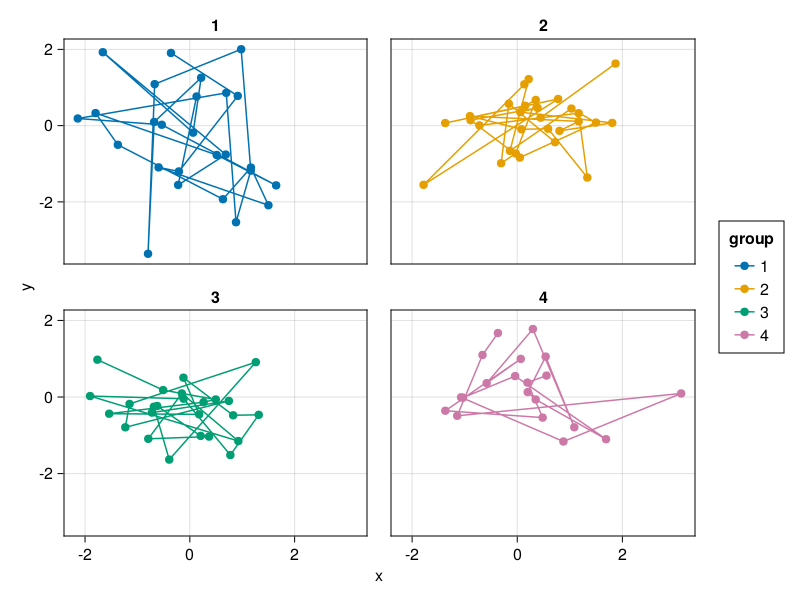

In [16]:
g = data(df) * mapping(:x, :y, layout = :group, color = :group) *
    (visual(Scatter) + visual(Lines))
fig = draw(g)

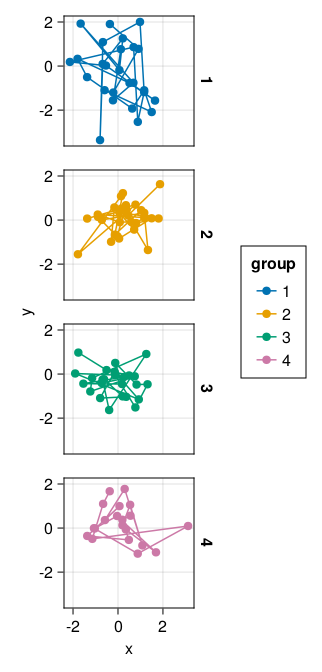

In [17]:
g = data(df) * mapping(:x, :y, row = :group, color = :group) *
    (visual(Scatter) + visual(Lines))
fig = draw(g, axis = (width = 130, height = 130))

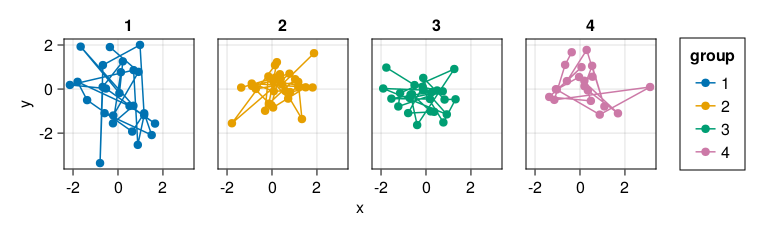

In [18]:
g = data(df) * mapping(:x, :y, col = :group, color = :group) *
    (visual(Scatter) + visual(Lines))
fig = draw(g, axis = (width = 130, height = 130))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*